# Multivariate Analysis

In [381]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn import cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import SpectralEmbedding

# The monoterpenes data
This dataset contains measurements of monoterpenes in certain plants.


In [382]:
#load the data
monoterps = pd.read_csv('metabolom_data.csv')
monoterps

,SampleID,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,MF032,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,MF034,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,MF036,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,MF038,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,MF049,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,MF307,wyoming,34.999561,110.826808,3.713417,1.092522,3.635173,25.416764,11.319855,57.996107,9.337529,31.488208,8.461742,18.543212,3.612682,91.353085,19.635540,193.448965,7.282802
90,MF308,3-tip,13.748601,0.000000,0.000000,8.024367,47.490551,125.726955,20.436416,0.000000,30.094909,4.942429,0.000000,0.759998,0.000000,0.000000,421.669616,12.199856,0.544602
91,MF309,3-tip,13.946355,0.000000,0.000000,8.285327,81.580728,142.999149,0.670380,0.000000,38.130357,4.841986,0.000000,0.000000,0.000000,0.000000,497.831436,13.430400,0.000000
92,MF310,wyoming,43.199183,67.388458,17.454482,0.788624,2.435465,17.218276,74.732220,18.961495,3.335756,47.823441,6.603522,10.623682,41.042015,49.214527,31.067011,75.488476,0.203115


The monoterpenes data contains columns with numerical data and a target column with different classes. The target variable (Species) will be predicted using the other features in the dataset. This implies a multi-linear regression problem since there are multiple (3) classes in the target column.


In [383]:
#inspect distribution of the classes
monoterps.Species.value_counts()

wyoming    66
3-tip      26
hybrid      2
Name: Species, dtype: int64

Since the classes in the dataset are not balanced (i.e the number of observations in each classes are not uniformly distributed), it is expected that the model will be biased towards the majority class. The hybrid class especially is expected to be predicted inaccurately since there arent enough data points representing this class.

<AxesSubplot:>

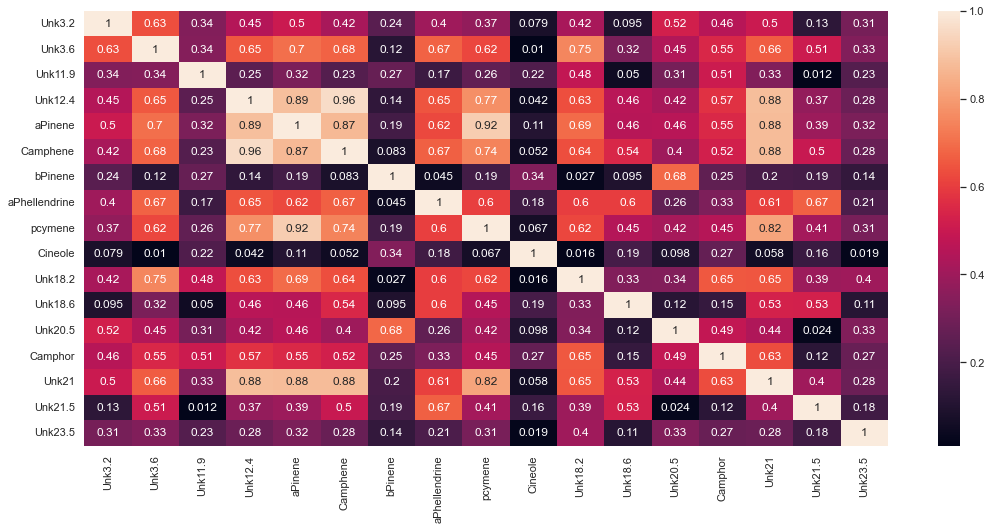

In [384]:
#plot heatmap to check for correlation between features
sns.set(rc = {'figure.figsize':(18,8)})
c = monoterps.corr().abs()
sns.heatmap(c, annot = True)

The heatmap above shows that a number of the feautures are correlated. For example: the feautures (monoterpenes) Unk21, Unk12.4, aPinene, Camphene and pcymene are correlated. This implies that these monoterpenes will have similar concentrations in plants. If one of them has low concentration in a certain plants leaves, the others will have low concentrations too, and vice versa.
Unk3.6 and Unk18.2 also show correlation with each other.

In [385]:
#check for missing data
monoterps.isnull().sum()

SampleID         0
Species          0
Unk3.2           0
Unk3.6           0
Unk11.9          0
Unk12.4          0
aPinene          0
Camphene         0
bPinene          0
aPhellendrine    0
pcymene          0
Cineole          0
Unk18.2          0
Unk18.6          0
Unk20.5          0
Camphor          0
Unk21            0
Unk21.5          0
Unk23.5          0
dtype: int64

Since the target varible for these data set is categorical, it has to be converted to numerical representations in order for the linear regression model to be able to compute the values. For this purpose, the following mapping was done:
wyomig - 1
3-tip - 2
hybrid - 3

In [386]:
#convert target variables to number
def to_number(row):  
    if row['Species'] == 'wyoming':
        return 1
    elif row['Species'] == '3-tip':
        return 2
    elif row['Species'] == 'hybrid':
        return 3
monoterps['label'] = monoterps.apply(lambda row: to_number(row), axis=1)

In [387]:
#extract the prediction features
features = monoterps.iloc[:, 2:-1]
features.head(5)

,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


In [388]:
#inspect mean to see if they are close for all columns
features.mean()

Unk3.2            23.637208
Unk3.6            49.746440
Unk11.9            6.028160
Unk12.4            4.369462
aPinene           22.911734
Camphene          73.423817
bPinene           39.719561
aPhellendrine     19.620489
pcymene           13.460596
Cineole           31.659868
Unk18.2            3.866462
Unk18.6           10.295510
Unk20.5           10.949594
Camphor           51.884227
Unk21            184.170440
Unk21.5           70.105139
Unk23.5            4.835827
dtype: float64

In [389]:
#inspect variance to see if they are close for all columns
features.var()

Unk3.2             138.350243
Unk3.6            2110.001773
Unk11.9             95.261882
Unk12.4             21.462802
aPinene            910.129033
Camphene          6170.488417
bPinene           1505.017624
aPhellendrine      375.569212
pcymene            222.498943
Cineole           1631.931309
Unk18.2             12.886749
Unk18.6            108.685436
Unk20.5            241.491570
Camphor           2618.750207
Unk21            73000.890923
Unk21.5           7147.817055
Unk23.5             88.161071
dtype: float64

The variance for the columns are far from each other. For example Unk21 has a variance as high as 73000.890923, while Unk18.2 has a variance of only 12.886749. This shows that the feautures have different spread of values. Some features have very large numbers while others are small numbers. In order to prevent the model from giving more importance to features simply because of their magnitude, it is necessary to scale the feauture values.

In [390]:
#scale
scaler = StandardScaler()
# transform data
features = scaler.fit_transform(features)
X = features

In [391]:
#assign y values
y = monoterps.label

In [392]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [393]:
#create regression model
regr = LinearRegression()
#fit the model
model = regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4877629344914679


As expected, the coefficent of determination for the model (r-squared) is very low. Only about 48% of the the variance in species can be explained by this model. This suggests that the observations are far from the predicted values.

In [394]:
y_pred = model.predict(X_test)

In [395]:
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.01341074 -0.0983425   0.25087318 -0.21343891  0.01206105  0.19150012
  0.01125137 -0.15943668  0.28603004 -0.18075661 -0.07365038  0.07987804
 -0.0528665   0.00177838  0.10685487  0.1971147   0.11474478]
Mean squared error: 0.12
Coefficient of determination: 0.49


In [396]:
#annotate the values at index 5 and 8
print(monoterps.columns[2::].to_list()[5])
print(monoterps.columns[2::].to_list()[8])

Camphene
pcymene


From the coefficients, it is observed that Camphene and pcymene have a very weak positive correlation with the species of the plants. This makes sense since these feautures are correlated with each other.


In [397]:
print(model.intercept_)
print(model.coef_[0])

1.3453895299933831
0.013410739570999962


The intercept shows a weak positive correlations between the variables and the target. 
It is very difficcult to show the errors of this model since the target variable is not continous. Furthermore, it is hard to plot a regression line for non-continous values. 

These challenges are due to the choice of model. This problem is a classification problem, and although a linear regression model can be applied, it is more suitable to treat it as a classification problem.

Since the target variables are classes, it would be appropriate to perform classification and see how different feautures vary in different classes. 
The independent variables in this data are continous and the dependent variable is categorical, hence linear discriminant analysis is worth trying. This method will attempt to maximize the separation of the groups. This is suitable since we are trying to find good separations in the classes.

<font color='red'>
   Assessment: (M)LR is not the way to go here. You have three categories and you can't just assign numerical values to them. With two classes, you can get away with it, but why would 'hybrid' be one greater than 3-tip? Because there are only 2 hybrid species, they will be pretty much ignored, but still. In addition, for regression, it is not necessary to normalize the data and in many cases you just shouldn't. You also don't plot any results from the regression and, no, it's not hard to plot a regression line for non-continuous values, because you assume there's a linear model in your approach. Alternatively, you can just plot the average for each value, such that you at least get a visual of the residuals.
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 0
- justify the selections (rows/columns) and/or treatment of the data (15%) 15
- explain/justify the choices made in the application of the method (15%) 5
- plot the results in a clear and logical manner (20%) 0
- interpret and reflect on the results (30%) 0

In [398]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [399]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X, y)

LinearDiscriminantAnalysis()

In [400]:
print(LDA.score(X, y))

0.9893617021276596


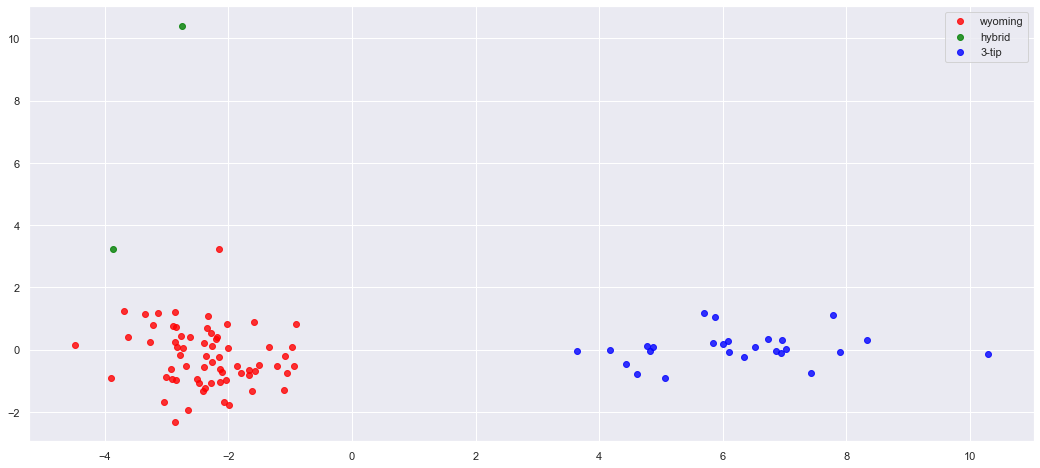

In [401]:
#define data to plot
data_plot = LDA.fit(X, y).transform(X)
target_names = set(monoterps.Species)

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [1,3,2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
               label = target_name )

#add legend to plot
plt.legend(loc='best', shadow=False)

#display LDA plot
plt.show()

LDA succesfully separated the data with an accuracy of 98%. It is clear that the projections of LDA shows that there are 3 classes as expected. Classes wyoming(red) and 3-tip(green) have very good separation and cluster at the diffferent ends of the x-axis. This suggests that there is a feauture or sets of feautures that are low in wyoming and but high in 3-tip. It can also be observed that the hybrid class (blue) is closer to wyoming than to 3 tip. But since we don not have enough hybrid data (which can also be observed from the LDA plot), no concrete conclusions can be made with regards to the hybrid class.

<font color='red'>
   Assessment: Quite fine. It would have been good to also have a look at the coefficients (loadings) of the discriminant axis to see which features set apart the two groups and reflect on this.
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 20
- justify the selections (rows/columns) and/or treatment of the data (15%) 15
- explain/justify the choices made in the application of the method (15%) 15
- plot the results in a clear and logical manner (20%) 15
- interpret and reflect on the results (30%) 20

# The Covid19 Data

The source data contains the infrared spectra from saliva of people that tested negative and people that tested positive for covid 19. The data set contains 183 observations and 253 infared spectra featutres. These feautures are far too many and dimensionality reduction techniques could prove useful to reduce computational costs and make classification of infected and non-infected persons more accurate.

Saliva contains SARS-CoV-2 virions, it is also known to carry several others COVID-19biomarkers,including ACE2, adenosinedeaminase,immunoglobulinG etc. It is expected that there would be clear separation in the spectra of salivas of infected and non-infected persons since the virions and biomarkers will be absent in non-infected people.


In [402]:
#load data
covid =  pd.read_excel('SourceData2.xlsx')
covid.head(5)

,ID,Ct,1300,1298,1296,1294,1292,1290,1288,1286,...,818,816,814,812,810,808,806,804,802,800
0,N1,NaN,0.277705,0.277532,0.277387,0.277217,0.277042,0.276930,0.276856,0.276737,...,0.242726,0.241897,0.241107,0.240374,0.239742,0.239234,0.238833,0.238523,0.238314,0.238197
1,N1,NaN,0.251624,0.251438,0.251268,0.251067,0.250843,0.250645,0.250467,0.250280,...,0.213427,0.212628,0.211891,0.211234,0.210662,0.210173,0.209763,0.209450,0.209267,0.209202
2,N1,NaN,0.083310,0.083293,0.083307,0.083338,0.083391,0.083478,0.083585,0.083674,...,0.085724,0.085260,0.084823,0.084445,0.084137,0.083894,0.083715,0.083602,0.083543,0.083495
3,N2,NaN,0.067509,0.067070,0.066684,0.066359,0.066106,0.065938,0.065852,0.065828,...,0.055012,0.054969,0.054902,0.054832,0.054781,0.054767,0.054787,0.054823,0.054857,0.054893
4,N2,NaN,0.129576,0.128690,0.127912,0.127232,0.126676,0.126306,0.126138,0.126113,...,0.099128,0.098794,0.098337,0.097886,0.097527,0.097272,0.097091,0.096970,0.096906,0.096881


In [403]:
#make a column for status (positive and negative)
covid['Status'] = covid.apply(lambda row: row["ID"][0], axis = 1)


In [404]:
#inspect
covid.head(5)

,ID,Ct,1300,1298,1296,1294,1292,1290,1288,1286,...,816,814,812,810,808,806,804,802,800,Status
0,N1,NaN,0.277705,0.277532,0.277387,0.277217,0.277042,0.276930,0.276856,0.276737,...,0.241897,0.241107,0.240374,0.239742,0.239234,0.238833,0.238523,0.238314,0.238197,N
1,N1,NaN,0.251624,0.251438,0.251268,0.251067,0.250843,0.250645,0.250467,0.250280,...,0.212628,0.211891,0.211234,0.210662,0.210173,0.209763,0.209450,0.209267,0.209202,N
2,N1,NaN,0.083310,0.083293,0.083307,0.083338,0.083391,0.083478,0.083585,0.083674,...,0.085260,0.084823,0.084445,0.084137,0.083894,0.083715,0.083602,0.083543,0.083495,N
3,N2,NaN,0.067509,0.067070,0.066684,0.066359,0.066106,0.065938,0.065852,0.065828,...,0.054969,0.054902,0.054832,0.054781,0.054767,0.054787,0.054823,0.054857,0.054893,N
4,N2,NaN,0.129576,0.128690,0.127912,0.127232,0.126676,0.126306,0.126138,0.126113,...,0.098794,0.098337,0.097886,0.097527,0.097272,0.097091,0.096970,0.096906,0.096881,N


In [405]:
#check for number of missing values in column CT
covid.Ct.isna().sum()

132

There are too many missing values in the column Ct (more than half of the observations have no value for ct), so it is recommended to drop it.

In [406]:
#drop column Ct
covid = covid.drop(['ID', 'Ct'], axis=1)

In [407]:
#check data types
covid.dtypes

1300      float64
1298      float64
1296      float64
1294      float64
1292      float64
           ...   
806       float64
804       float64
802       float64
800       float64
Status     object
Length: 252, dtype: object

In [408]:
#inspect the mean
covid.mean().array

/var/folders/ff/214dlb3n4zv447sccjh9v2jc0000gn/T/ipykernel_14653/798472072.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covid.mean().array


<PandasArray>
[0.29410314512732233,  0.2933295680945356, 0.29263204177322416,
  0.2920165985710383, 0.29150617407704926,  0.2911410238016394,
  0.2909246846846995,  0.2908180122508195,  0.2907958043513661,
  0.2908566430999999,
 ...
 0.22519397492732243, 0.22474385832677607, 0.22426426810928943,
 0.22377673493715836, 0.22331648462786885, 0.22290461169617493,
 0.22254355548415317, 0.22224715310163945, 0.22204542400382524,
 0.22194866690491824]
Length: 251, dtype: float64

In [409]:
##checking for columns with very high variance
highvar_columns = (covid.var()
                .sort_values(ascending=False))

highvar_columns = highvar_columns.loc[np.abs(covid.var() - covid.var().mean()) > 0.1] #check if variance is significantly different from the mean variance 
highvar_columns

/var/folders/ff/214dlb3n4zv447sccjh9v2jc0000gn/T/ipykernel_14653/1504579521.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  highvar_columns = (covid.var()
/var/folders/ff/214dlb3n4zv447sccjh9v2jc0000gn/T/ipykernel_14653/1504579521.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  highvar_columns = highvar_columns.loc[np.abs(covid.var() - covid.var().mean()) > 0.1] #check if variance is significantly different from the mean variance


Series([], dtype: float64)

Since the means and variances of columns are not far from one another, the data does not need to be centered or scaled.

In [410]:
#Normalize the data since PCA assumes normal distribution
data = pd.DataFrame(preprocessing.scale(covid.iloc[:,:-1]))
data.columns = list(covid.iloc[:,:-1].columns)

In [411]:
X = data.iloc[:,1:].values
X.shape

(183, 250)

In [412]:
#perform PCA
pca = PCA(n_components=10) #start with 10 components
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.532738,-1.628312,-0.114569,0.076638,0.188307,0.046744,0.032112,0.053848,-0.060446,-0.063467
1,-2.278999,-1.179401,0.139293,0.027834,0.235883,-0.044731,0.052701,0.078394,-0.013502,-0.040704
2,-18.489366,-0.996654,0.332934,0.421680,-0.004339,0.185999,-0.094445,0.140584,0.043441,-0.002768
3,-21.625670,0.285736,0.548509,0.512358,-0.014537,0.269543,-0.167512,0.120628,0.057047,-0.040811
4,-15.252275,0.657615,1.131306,0.215836,0.067321,0.178482,-0.143153,0.134174,0.070329,-0.082131


In [413]:
#check the amount of variance explained by the pca
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

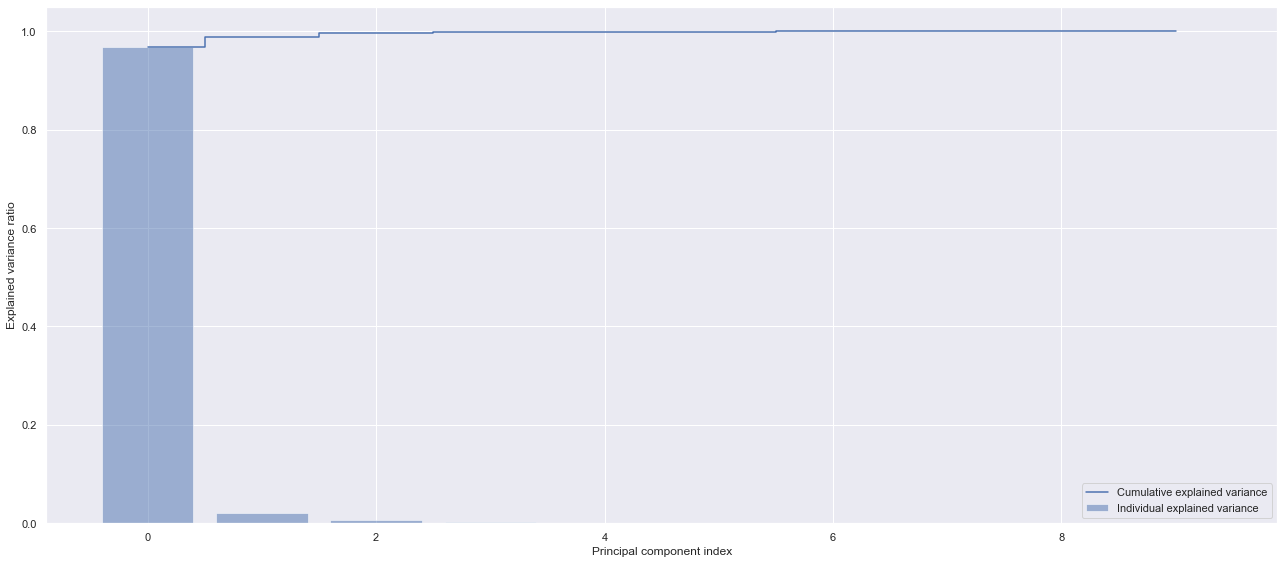

In [414]:
#plot it
plt.bar(range(len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

This plot show that all the variables in the data set can be reduced to a single parameter while retaining most of the information. This means there is an effective linear combination for all the measured variables.

In [415]:
#perform another PCA with the desired amount of explained variance as input
pca = PCA(n_components= 0.99)
X_reduced = pca.fit_transform(X)

In [416]:
X_reduced = pca.fit_transform(X)
X_reduced.shape

(183, 3)

All 251 columns are now reduced to only 3

In [417]:
#convert the pcs to dataframe
principalDf = pd.DataFrame(data = X_reduced)
principalDf.head()

,0,1,2
0,0.532738,-1.628312,-0.114569
1,-2.278999,-1.179401,0.139293
2,-18.489366,-0.996654,0.332934
3,-21.625670,0.285736,0.548509
4,-15.252275,0.657615,1.131306


In [418]:
#add labels to the data frame
principalDf['Status'] = covid['Status']
principalDf.head()

,0,1,2,Status
0,0.532738,-1.628312,-0.114569,N
1,-2.278999,-1.179401,0.139293,N
2,-18.489366,-0.996654,0.332934,N
3,-21.625670,0.285736,0.548509,N
4,-15.252275,0.657615,1.131306,N


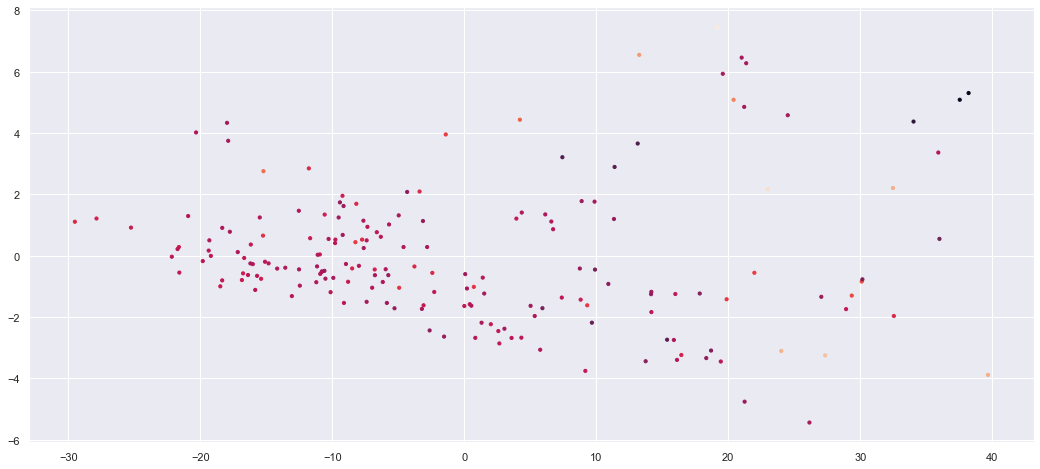

In [419]:
#Plot the projections
plt.scatter(X_reduced[:,0], X_reduced[:,1], c= X_reduced[:, 2], s=10)
plt.show()

The projections do not show any clear separation

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

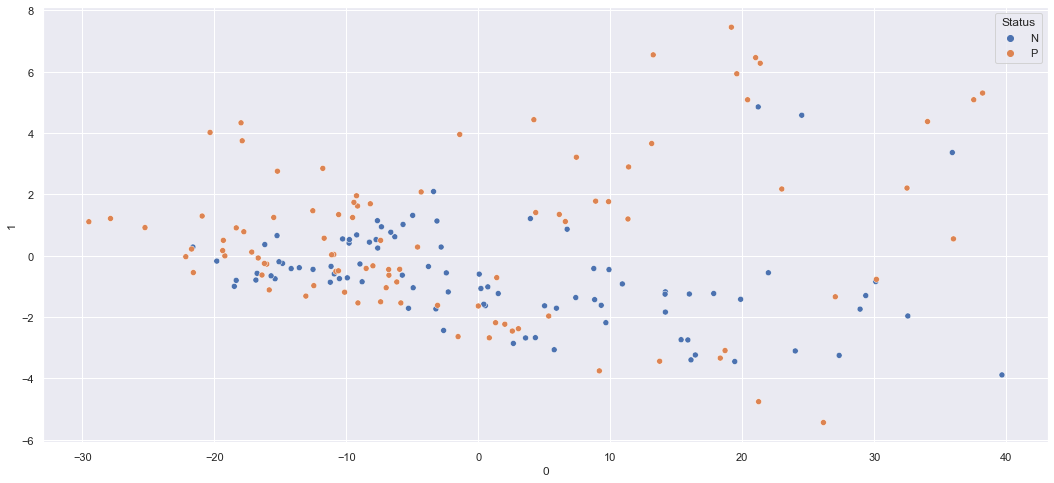

In [420]:
#plot components 1 and 2 and color by labels
sns.scatterplot(principalDf[0], principalDf[1], hue = covid['Status'])

This plot shows that the first component displays the variation on the data as the plot of explained variance showed. The first component captures the variation in the data sufficiently.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='2'>

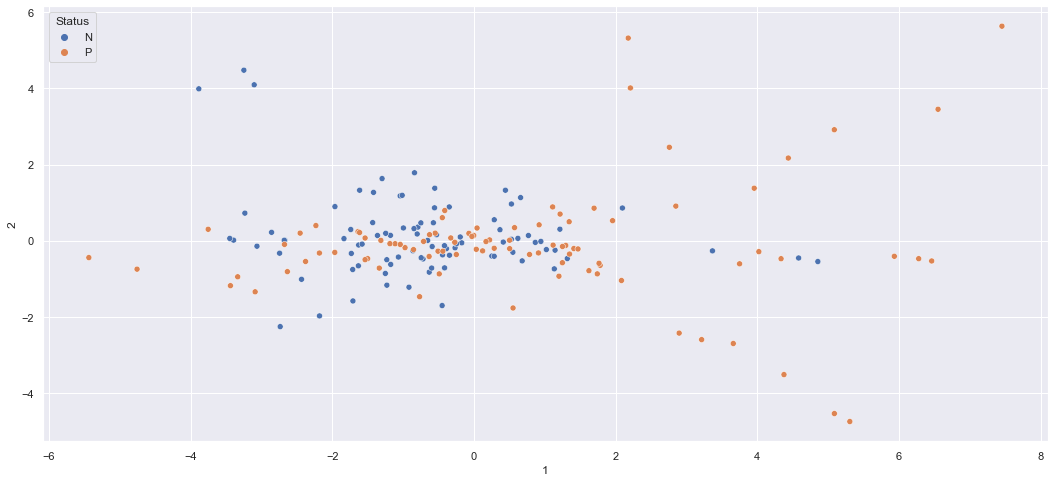

In [421]:
#plot second and third components
sns.scatterplot(principalDf[1], principalDf[2], hue = covid['Status'])

When compared to the third component, the the second component explains the variation in the data better.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='2'>

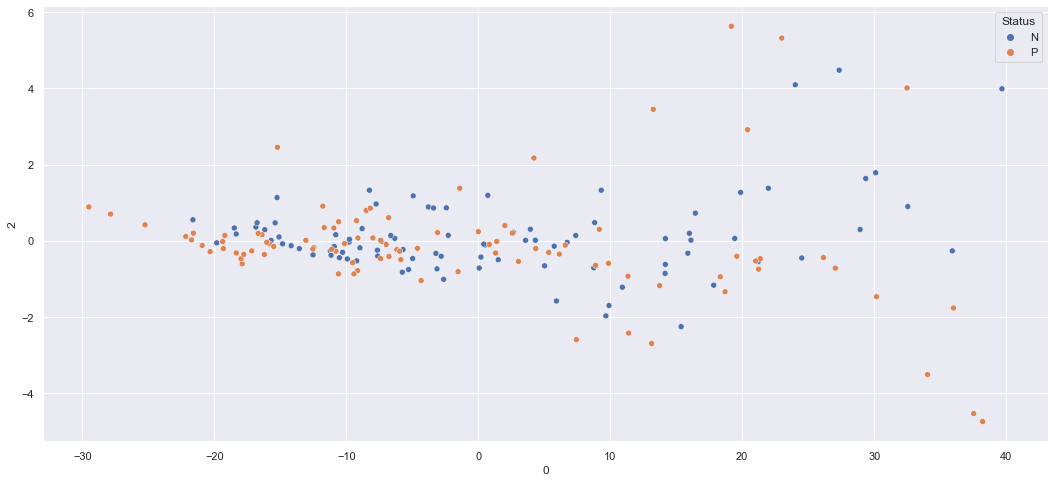

In [422]:
#plot first and third components
sns.scatterplot(principalDf[0], principalDf[2], hue = covid['Status'])

Again, the first component can be seen to capture the variation along the x-axis properly, suggesting that the saliva of infected people differs from the saliva of non-infected people as expected.

Although, 99% of the variance in the feautures can be explained by the 3 three principal components, plotting the components does not visualize the separation of the classes. This could be due to the fact that sometimes it is difficut to investigate dimensions in 2-D. It is also possible that absence of some virions and covid biomarkers in the saliva of non-infected people was not picked up by PCA.
It is important to note that incomparison to the number of features, the number of observations is far too little.

However, it is quite interessting that all the ~250 columns that describe the infared spectra from saliva of people who have tested positive or nrgative for codid-19 can be described by 3 features.


<font color='red'>
   Assessment: The idea of doing PCA on these data is fine, but why would you expect a clear separation between the groups? It's (always) quite possible that the within-groups spread is larger. Then you check the variances as deviations from the average to see if scaling is needed (while you should just check the smallest and largest) and conclude that scaling is not needed, but later you state that the data should be normalized, stating normality is a requirement for PCA (which it is not) and you _do_ scale the data. Part of the scaling is centering, which you said was not necessary (but it _always_ is for PCA). The plotting is fine, but you conclude 'suggesting that the saliva of infected people differs from the saliva of non-infected people as expected', which is not supported by your results, and which you contradict in the paragraph after ('does not visualize the separation of the classes'). 
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 10
- justify the selections (rows/columns) and/or treatment of the data (15%) 15
- explain/justify the choices made in the application of the method (15%) 5
- plot the results in a clear and logical manner (20%) 20
- interpret and reflect on the results (30%) 15


# Spectral embedding
Since PCA did not show clear separation of the classes in the data, spectral embedding will be used to attempt to visualize the PCA compenents.

In [423]:
# do spectral embedding and color by label to see the clusters present
embedding = SpectralEmbedding(n_components=3, random_state = 2)
X_transformed = embedding.fit_transform(X_reduced)
X_transformed.shape

(183, 3)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


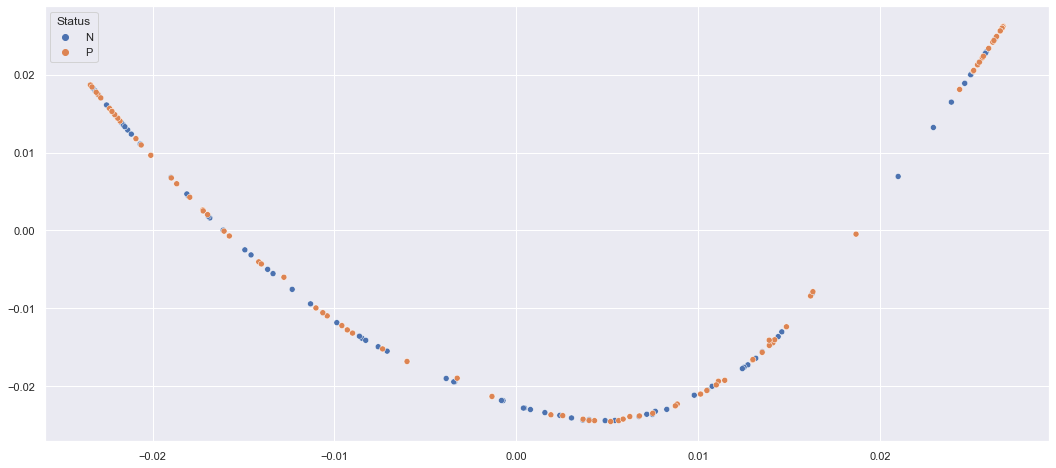

In [424]:
#plot
sns.scatterplot(X_transformed[:,0], X_transformed[:,1],hue = covid['Status'] )
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


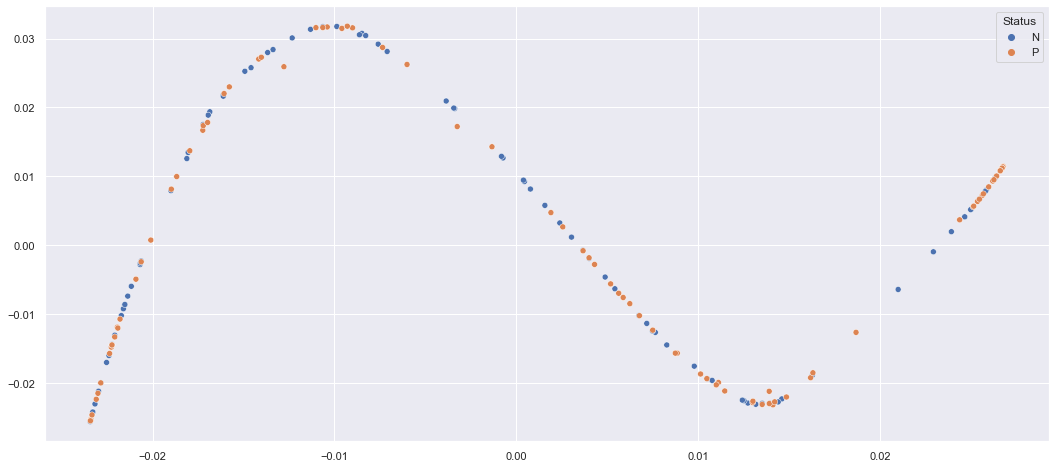

In [425]:
#plot
sns.scatterplot(X_transformed[:,0], X_transformed[:,2],hue = covid['Status'] )
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


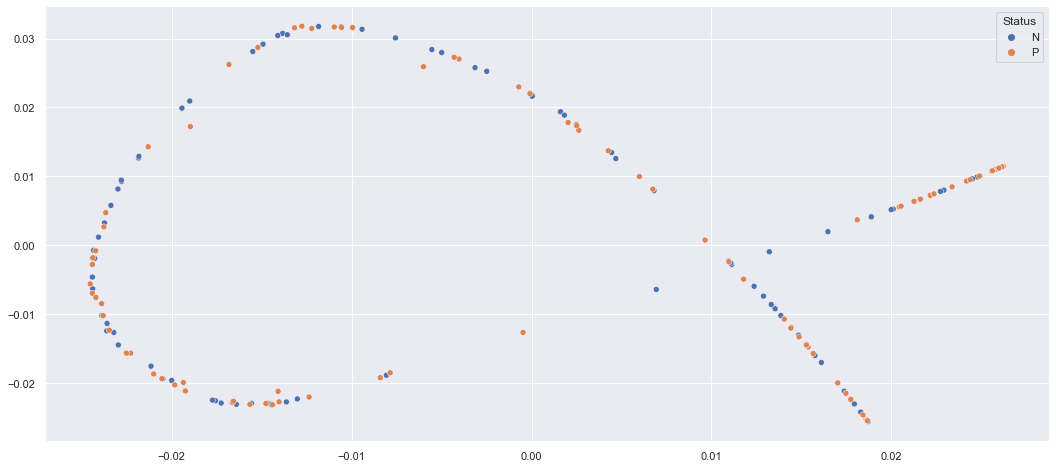

In [426]:
#plot
sns.scatterplot(X_transformed[:,1], X_transformed[:,2],hue = covid['Status'] )
plt.show()

Again, it is observed that the separation seems to be in a dimension that can not be observed in 2D. 

<font color='red'>
   Assessment: The reason for using SGP/SE is not clear, nor what is expected to come out of it. In addition, you don't explain why you only use the scores on the first three components and you don't explain what the results show. What does this mean?
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 0
- justify the selections (rows/columns) and/or treatment of the data (15%) 0
- explain/justify the choices made in the application of the method (15%) 0
- plot the results in a clear and logical manner (20%) 20
- interpret and reflect on the results (30%) 0



# Linear Discriminate Analysis

Since linear dicriminate analysis focuses on increasing the separation between classed, it will be applied on the feautures. It is expected that some separation will be observed by visualization.

In [427]:
#encode the data labels
le = LabelEncoder()
label = le.fit_transform(covid['Status'])

In [428]:
#perform LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X, label)

LinearDiscriminantAnalysis()

In [429]:
print(LDA.score(X, label))

0.9890710382513661


The LDA score already looks promising. The model is able to classify the 2 classes with good accuracy.

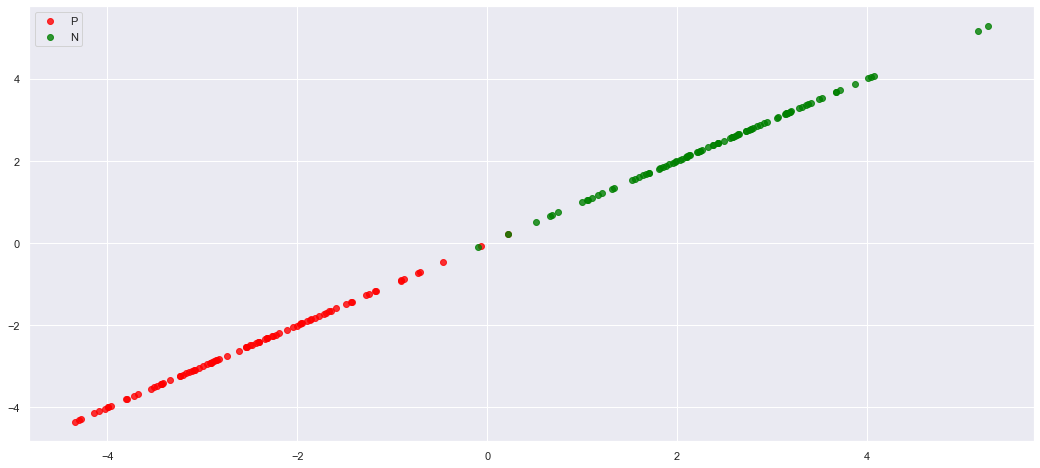

In [430]:
#define data to plot
data_plot = LDA.fit(X, label).transform(X)
target_names = set(covid.Status)

#create LDA plot
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(data_plot[label == i], data_plot[label == i], alpha=.8, color=color,
                label = target_name)

#add legend to plot
plt.legend(loc='best', shadow=False)

#display LDA plot
plt.show()

Finally, LDA shows a separation between the two classes. There is obviously an overlap which might be due to specificity and sensitivity. There are probably some false positive and false negative predictions which could be due to the limited amount of data. 
As suspected, those who tested negative have low values and those eho tested negsstive have higher values. These values are suspected to be influenced by the presence or absence of covid virions and biomarkers.

<font color='red'>
   Assessment: Fine. The plot is a bit weird, having the same variable on both axes. A propos, you should not use red and green to color points, as R/G color blindness is not very rare. You mention the overlap, but that's just one point of each group around 0. It would've been nice to have reflection on the nature of the discriminant axis and the relation to the PCA results.
</font>

- give the rationale for using the method for the data selected and state expectations (20%) 20
- justify the selections (rows/columns) and/or treatment of the data (15%) 15
- explain/justify the choices made in the application of the method (15%) 15
- plot the results in a clear and logical manner (20%) 10
- interpret and reflect on the results (30%) 20

